<a href="https://colab.research.google.com/github/evillag/xtol_m5/blob/master/T3/FIT_M5T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 5, Task 3: Build and Evaluate Models**
## **Data Science with Python (XTOL - Cenfotec)**
## *Author: Esteban  Villalobos*
## *March 19$^{th}$, 2020*

In [0]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# datasets
from sklearn import datasets

#model metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = [10.0, 8.0]
# Plot font sizes (source: https://stackoverflow.com/a/39566040/366771)
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Tutorial: Perform a regression sample on the amount paid on the 6th month.

In [2]:
# data
rawData = pd.read_csv('https://raw.githubusercontent.com/evillag/xtol_m5/master/T2/default%20of%20credit%20card%20clients.csv',
                              header=1, index_col=0)
rawData.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

## 1. Select the features

In [4]:
#featuresv
features = rawData.iloc[:,11:22]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
ID,,,,,,,,,,,
1,3913,3102,689,0,0,0,0,689,0,0,0
2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
3,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
4,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
5,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


## 2. Select the Dependent Variable

In [0]:
#dependent variable
depVar = rawData['PAY_AMT6']

## 3. Establish the training set for the X-variables or Feature space (first 1000 rows: only for this example you will still follow a 70/30 split for your final models)

In [6]:
#Training Set (Feature Space: X Training)
X_train = features[: 1000].as_matrix()
X_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[  3913,   3102,    689, ...,      0,      0,      0],
       [  2682,   1725,   2682, ...,   1000,   1000,      0],
       [ 29239,  14027,  13559, ...,   1000,   1000,   1000],
       ...,
       [     0,      0,      0, ...,      0,      0,      0],
       [   780,      0,    780, ...,      0,    390,    500],
       [113348, 110119, 111700, ...,   3158,   3934,   3802]])

## 4. Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)

In [7]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train[0:5]

The number of observations in the Y training set are: 1000


ID
1       0
2    2000
3    5000
4    1000
5     679
Name: PAY_AMT6, dtype: int64

## 5. Establish the testing set for the X-Variables or Feature space

In [8]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5
ID                                      ...                              
29901      16809          0          0  ...         0         0         0
29902      50845      48750     103486  ...      3250      1563      1208
29903      10392     168088     168955  ...      7335      4448      4519
29904      27378      17082      13333  ...        99        99    172104
29905      54952      56021      54126  ...      5800      2000      1000

[5 rows x 11 columns]


## 6. Establish Ground truth 

In [9]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


ID
29901        0
29902      781
29903     5003
29904    30013
29905     1462
Name: PAY_AMT6, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train

array([[ 3967,  8322,  3394, ..., 12902, 27000,     0],
       [  291,   291,   291, ...,   291,   291,   291],
       [42838, 37225, 36087, ...,   320,   500,  1000],
       ...,
       [47790, 18114, 18250, ...,  2000,   500,  1000],
       [35369, 35320,     0, ...,     0,     0,     0],
       [12865,  4462, 19560, ...,   222,  5355,   998]])

In [11]:
X_train.shape, X_test.shape

((750, 11), (250, 11))

## Models training

In [12]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor(n_jobs=12)
modelLR = LinearRegression(n_jobs=12)
modelDT = DecisionTreeRegressor()

models = [modelSVR, modelRF, modelLR, modelDT]

#features
features = rawData.iloc[:,11:22]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
ID,,,,,,,,,,,
1,3913,3102,689,0,0,0,0,689,0,0,0
2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
3,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
4,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
5,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [13]:
#dependent variable
print(depVar)

ID
1           0
2        2000
3        5000
4        1000
5         679
         ... 
29996    1000
29997       0
29998    3100
29999    1804
30000    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [0]:
def trainModels(models, X, y):
  for model in models:
    model.fit(X, y)

trainModels(models, X_train, y_train)

The mean score and the 95% confidence interval of the score estimate of each model are given by:

In [15]:
def scoreModels(model_list, Xtrain, ytrain, Xtest, ytest, scoringMethod='r2'):
  for model in model_list:
    print(f"Model type: {type(model)}")
    scores = cross_val_score(model, Xtrain, ytrain, scoring=scoringMethod)
    print(scores)
    print(model.score(Xtest, ytest))

scoreModels(models, X_train, y_train, X_test, y_test)

Model type: <class 'sklearn.svm._classes.SVR'>
[-0.09636656 -0.09810097 -0.01393182 -0.05461895 -0.02035635]
-0.0486386117192974
Model type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
[-0.37174549 -0.52561727  0.0023891  -0.0306233   0.0890696 ]
0.15955113124523712
Model type: <class 'sklearn.linear_model._base.LinearRegression'>
[-0.60510995 -4.01121952  0.41797581 -0.42888797  0.61791435]
-0.40014392117668085
Model type: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
[ 0.01023867 -3.05093688 -0.03244901 -0.42771489 -0.02215165]
-0.0865040662202321


### Let's recreate the test and train splits to see if accuracy improves

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, 
                                                    test_size=0.4, 
                                                    random_state=0)


In [17]:
trainModels(models, X_train, y_train)
scoreModels(models,  X_train, y_train, X_test, y_test)

Model type: <class 'sklearn.svm._classes.SVR'>
[-0.02881889 -0.03338497 -0.03582389 -0.03834166 -0.03519474]
-0.0274565288119204
Model type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
[ 0.08715648  0.15068873  0.10247031  0.09503711 -0.00780759]
0.08855659405356953
Model type: <class 'sklearn.linear_model._base.LinearRegression'>
[0.086667   0.14384679 0.11227699 0.07901694 0.06452834]
0.1322632269235603
Model type: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
[-0.55344466 -0.79017374 -0.52480637 -1.08500464 -1.7169209 ]
-0.5527251174049217


The random forest seems to have the high performance, near  ~0.87. We will validate with this model for the current excercise.

Note that the desicion tree had near ~0.99 accuracy, however such accuracy could lead to overfitting.

In [18]:
predictions = modelRF.predict(X_test)
predictions

array([ 1203.11,  1096.47,  1087.42, ...,  5993.53, 14716.55,  2000.53])

In [19]:
rmse = sqrt(mean_squared_error(y_test.to_numpy(), predictions))
print('RMSE: %.3f' % rmse)

RMSE: 18184.957


In [20]:
predRsquared = r2_score(y_test.to_numpy(), predictions)
print('R Squared: %.3f' % predRsquared)

R Squared: 0.089


[ 644    0    0 ... 2633 9000 3870]


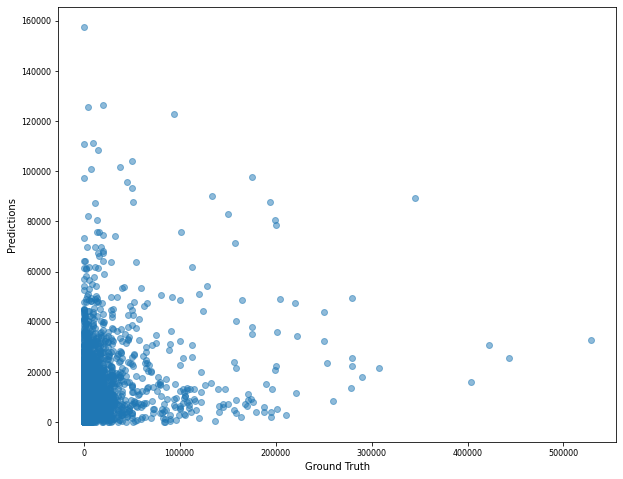

In [21]:
print(y_test.to_numpy())
plt.scatter(y_test.to_numpy(), predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# Credit One

## Load dataset

In [97]:
credit = pd.read_csv('https://raw.githubusercontent.com/evillag/xtol_m5/master/T2/default%20of%20credit%20card%20clients.csv',
                              header=1, index_col=0)

print(credit.columns)
credit = credit.rename(columns={
    'default payment next month': 'DEFAULT',
    'PAY_0': 'PAY_STATUS_SEP',
    'PAY_2': 'PAY_STATUS_AUG',
    'PAY_3': 'PAY_STATUS_JUL',
    'PAY_4': 'PAY_STATUS_JUN',
    'PAY_5': 'PAY_STATUS_MAY',
    'PAY_6': 'PAY_STATUS_APR',
    'BILL_AMT1': 'BILL_SEP',
    'BILL_AMT2': 'BILL_AUG',
    'BILL_AMT3': 'BILL_JUL',
    'BILL_AMT4': 'BILL_JUN',
    'BILL_AMT5': 'BILL_MAY',
    'BILL_AMT6': 'BILL_APR',
    'PAY_AMT1': 'PAID_SEP',
    'PAY_AMT2': 'PAID_AUG',
    'PAY_AMT3': 'PAID_JUL',
    'PAY_AMT4': 'PAID_JUN',
    'PAY_AMT5': 'PAID_MAY',
    'PAY_AMT6': 'PAID_APR',
})
credit.info()

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_STATUS_SEP    30000 non-null int64
PAY_STATUS_AUG    30000 non-null int64
PAY_STATUS_JUL    30000 non-null int64
PAY_STATUS_JUN    30000 non-null int64
PAY_STATUS_MAY    30000 non-null int64
PAY_STATUS_APR    30000 non-null int64
BILL_SEP          30000 non-null int64
BILL_AUG          30000 non-null int64
BILL_JUL          30000 non-null int64
B

## Normalize and save dataframe for ML tasks
Only columns with monetary amounts will be normalized.

In [99]:
credit.head(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [100]:
# normalizable_df = credit[['LIMIT_BAL','BILL_SEP','BILL_AUG','BILL_JUL',
#                           'BILL_JUN','BILL_MAY','BILL_APR','PAID_SEP',
#                           'PAID_AUG','PAID_JUL','PAID_JUN','PAID_MAY',
#                           'PAID_APR',]]
#cred_normalized=((normalizable_df-normalizable_df.min())/(normalizable_df.max()-normalizable_df.min()))*20

# credit[['LIMIT_BAL','BILL_SEP','BILL_AUG','BILL_JUL','BILL_JUN','BILL_MAY',
#        'BILL_APR','PAID_SEP','PAID_AUG','PAID_JUL','PAID_JUN','PAID_MAY',
#        'PAID_APR']] = cred_normalized
#normalizable_df.head(15)
from sklearn.preprocessing import StandardScaler

normalizable_features = ['LIMIT_BAL','BILL_SEP','BILL_AUG','BILL_JUL',
                         'BILL_JUN','BILL_MAY','BILL_APR','PAID_SEP',
                         'PAID_AUG','PAID_JUL','PAID_JUN','PAID_MAY',
                         'PAID_APR',]

X = StandardScaler().fit_transform(credit[normalizable_features])

for i, v in enumerate(normalizable_features):
  credit[v] = X[:,i]


credit.head(20)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,-1.136720,2,2,1,24,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
2,-0.365981,2,2,2,26,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
3,-0.597202,2,2,2,34,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
4,-0.905498,2,2,1,37,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
5,-0.905498,1,2,1,57,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0
6,-0.905498,1,1,2,37,0,0,0,0,0,0,0.178947,0.110856,0.152777,-0.371029,-0.340357,-0.316487,-0.191003,-0.178215,-0.259486,-0.244230,-0.248683,-0.248381,0
7,2.562830,1,1,2,29,0,0,0,0,0,0,4.301531,5.098086,5.739063,7.762727,7.281574,7.305617,2.978712,1.479085,1.861472,0.983852,0.585848,0.481207,0
8,-0.520128,2,2,2,23,0,-1,-1,0,0,-1,-0.534359,-0.685644,-0.669262,-0.669062,-0.665674,-0.643203,-0.318999,-0.230905,-0.296801,-0.270976,-0.203716,-0.206642,0
9,-0.211833,2,3,1,28,0,0,2,0,0,0,-0.542385,-0.492930,-0.503332,-0.482684,-0.469082,-0.590276,-0.140952,-0.256990,-0.272265,-0.244230,-0.248683,-0.237130,0


In [101]:
#features = credit[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
features = credit[['LIMIT_BAL', 
                 'PAY_STATUS_SEP', 'PAY_STATUS_AUG', 'PAY_STATUS_JUL', 
                 'PAY_STATUS_JUN', 'PAY_STATUS_MAY', 'PAY_STATUS_APR', 
                 'BILL_SEP', 'BILL_AUG', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY', 
                 'BILL_APR', 'PAID_SEP', 'PAID_AUG', 'PAID_JUL', 'PAID_JUN',
                 'PAID_MAY', 'PAID_APR'
                 ]]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,PAY_STATUS_SEP,PAY_STATUS_AUG,PAY_STATUS_JUL,PAY_STATUS_JUN,PAY_STATUS_MAY,PAY_STATUS_APR,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR
ID,,,,,,,,,,,,,,,,,,,
1,-1.136720,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
2,-0.365981,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
3,-0.597202,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
4,-0.905498,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
5,-0.905498,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


## Select features and Dependant variable


In [102]:
#dependent variable
depVar = credit['DEFAULT']
depVar

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: DEFAULT, Length: 30000, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, 
                                                    test_size=0.25, 
                                                    random_state=641325)

In [104]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22500, 19) (7500, 19) (22500,) (7500,)


In [0]:
#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [0]:
#Models
modelSVC = SVC()
modelRC = RandomForestClassifier(n_jobs=12)
modelDTC = DecisionTreeClassifier()

modelsC = [modelSVC, modelRC, modelDTC]

In [0]:
trainModels(modelsC, X_train, y_train)

In [108]:
for model in modelsC:
  print(model)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=12, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, m

In [109]:
scoreModels(modelsC, X_train, y_train, X_test, y_test, 'accuracy')

Model type: <class 'sklearn.svm._classes.SVC'>
[0.82533333 0.81733333 0.81955556 0.82133333 0.82133333]
0.8169333333333333
Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0.82066667 0.80755556 0.81511111 0.81355556 0.81333333]
0.8114666666666667
Model type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
[0.73133333 0.72088889 0.72377778 0.73888889 0.72288889]
0.7262666666666666


Multi-layer perceptron models

In [110]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(5, 2),
                    max_iter=3000,
                    random_state=4384153)
clf1.fit(X_train, y_train)

clf2 = MLPClassifier(solver='sgd', 
                     alpha=1e-5,
                     hidden_layer_sizes=(5, 2), 
                     shuffle=True,
                     max_iter=3000,
                     random_state=4384153)
clf2.fit(X_train, y_train)

clf3 = MLPClassifier(solver='adam', 
                     alpha=1e-5,
                     hidden_layer_sizes=(5, 2), 
                     shuffle=True,
                     max_iter=3000,
                     random_state=4384153)
clf3.fit(X_train, y_train)


scoreModels([clf1, clf2, clf3], X_train, y_train, X_test, y_test, 'accuracy')

Model type: <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
[0.78088889 0.81777778 0.77888889 0.78       0.78066667]
0.7761333333333333
Model type: <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
[0.82244444 0.80755556 0.80911111 0.81666667 0.81666667]
0.8158666666666666
Model type: <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
[0.82155556 0.81755556 0.82088889 0.82088889 0.81666667]
0.8161333333333334


The SVC seems to have the high performance, near ~0.82. We will validate with this model for the current excercise.

In [111]:
predictions = modelSVC.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5820
           1       0.68      0.35      0.46      1680

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500



Confusion Matrix
[[0.73946667 0.03653333]
 [0.14653333 0.07746667]]


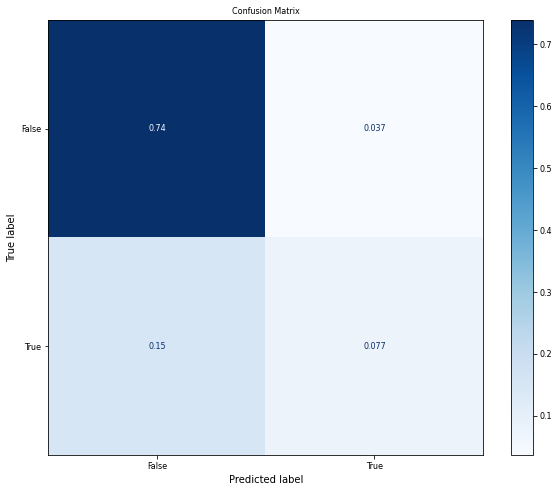

In [115]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(modelSVC, X_test, y_test, 
                             display_labels=['False', 'True'],
                             cmap=plt.cm.Blues,
                             normalize='all')
title = "Confusion Matrix"
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

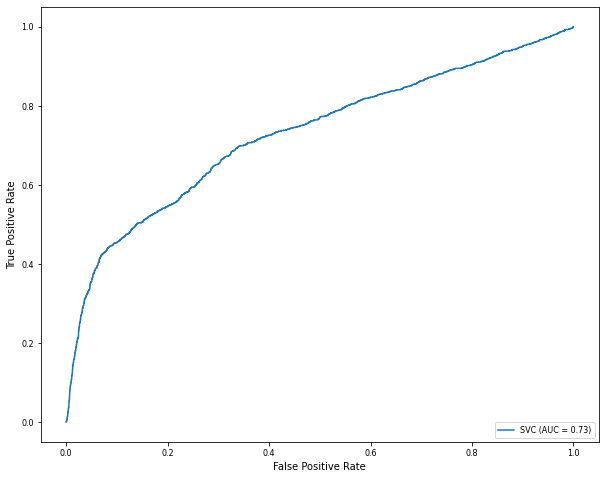

In [116]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(modelSVC, X_test, y_test)
title = "ROC Curve"
disp.ax_.set_title(title)
plt.show()